**Table of Contents** <br>

* [1.Import Libraries](#importlibraries)
* [2.Import Dataset](#importdataset)
* [3.Initial Analysis](#initialanalysis)
* [4. Data Pre-Processing](#datapreprocessing)
    * [4.1 Data Partition](#datapartition)
    * [4.2 Missing Values](#missingvalues)

<hr>
<a class="anchor" id="importlibraries">
    
# 1. Import libraries
    
</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#data partition
from sklearn.model_selection import train_test_split

#empty values
import missingno as msno

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

#
from math import ceil

#scaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

<hr>
<a class="anchor" id="importdataset">
    
# 2. Import Dataset
    
</a>

In [2]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
sample_submission = pd.read_csv('sample_submission.csv')

<hr>
<a class="anchor" id="initialanalysis">
    
# 3. Initial Analysis
    
</a>

In [3]:
train.head(20)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0
5,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,Not Work Related,5.0
6,2019-12-28,48.0,N,2020-01-01,N,0.00,1971.0,2019-12-31,NaN,LM INSURANCE CORP,...,19.0,"CUT, PUNCTURE, SCRAPE, NOC",40.0,LACERATION,36.0,FINGER(S),13029,0.0,Not Work Related,1.0
7,2019-12-30,33.0,N,2020-01-01,N,0.00,1986.0,2019-12-31,2020-03-04,STATE INSURANCE FUND,...,99.0,"OTHER - MISCELLANEOUS, NOC",71.0,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC",38.0,SHOULDER(S),10305,0.0,Not Work Related,6.0
8,2019-12-23,55.0,N,2020-01-01,N,0.00,1964.0,2020-01-01,NaN,"ROCHESTER, UNIVERSITY OF",...,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",60.0,LUNGS,14620,0.0,Not Work Related,6.0
9,2019-12-29,20.0,N,2020-01-01,N,225.00,NaN,2019-12-31,NaN,LM INSURANCE CORP,...,81.0,"STRUCK OR INJURED, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",14.0,EYE(S),11231,0.0,Not Work Related,6.0


In [4]:
test.head(10)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.00,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0
3,2022-12-28,55,N,2023-01-02,N,0.00,0.0,2023-01-02,NaN,INDEMNITY INS. OF N AMERICA,...,IV,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),10.0,CONTUSION,53.0,KNEE,11411,6
4,2022-12-20,25,N,2023-01-02,N,0.00,1997.0,2022-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,IV,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,40.0,LACERATION,37.0,THUMB,11212,5
5,2022-12-28,36,N,2023-01-02,N,0.00,1986.0,2023-01-02,NaN,NYC TRANSIT AUTHORITY,...,III,NaN,90.0,OTHER THAN PHYSICAL CAUSE OF INJURY,77.0,MENTAL STRESS,66.0,NO PHYSICAL INJURY,10941,4
6,2022-12-22,19,N,2023-01-02,N,688.20,2003.0,2022-12-30,NaN,"WAL-MART ASSOCIATES, INC.",...,I,NaN,56.0,LIFTING,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14131,6
7,2022-12-13,43,N,2023-01-02,N,0.00,0.0,2023-01-02,NaN,ERIE INSURANCE CO OF NY,...,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,49.0,SPRAIN OR TEAR,53.0,KNEE,13357,4
8,2022-12-28,40,N,2023-01-02,N,0.00,1982.0,2022-12-31,NaN,STARR INDEMNITY & LIABILITY CO,...,IV,NaN,87.0,FOREIGN MATTER (BODY) IN EYE(S),25.0,FOREIGN BODY,14.0,EYE(S),11735,3
9,2022-11-01,48,N,2023-01-02,Y,1180.74,1974.0,2023-01-02,2023-01-09,STATE INSURANCE FUND,...,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14720,0


In [5]:
train.shape

(593471, 33)

In [6]:
test.shape

(387975, 30)

In [7]:
columns_name = train.columns
columns_name

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'OIICS Nature of Injury Description',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents'],
      dtype='object')

In [8]:
test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Industry Code Description', 'Medical Fee Region',
       'OIICS Nature of Injury Description', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       385531 non-null  object 
 1   Age at Injury                       387975 non-null  int64  
 2   Alternative Dispute Resolution      387975 non-null  object 
 3   Assembly Date                       387975 non-null  object 
 4   Attorney/Representative             387975 non-null  object 
 5   Average Weekly Wage                 368771 non-null  float64
 6   Birth Year                          368505 non-null  float64
 7   C-2 Date                            378841 non-null  object 
 8   C-3 Date                            85216 non-null   object 
 9   Carrier Name                        387975 non-null  object 
 10  Carrier Type                        387975 non-null  object 
 11  Claim Identifier          

In [11]:
train.describe(include ='all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
count,570337,574026.000000,574026,593471,574026,5.453750e+05,544948.000000,559466,187245,574026,...,558386.000000,558386,558369.000000,558369,556944.000000,556944,545389,574026.000000,574026,574026.000000
unique,5539,NaN,3,1096,2,NaN,NaN,2475,1648,2046,...,NaN,74,NaN,56,NaN,54,10060,NaN,1,NaN
top,2020-03-01,NaN,N,2020-03-06,N,NaN,NaN,2021-05-11,2021-04-21,STATE INSURANCE FUND,...,NaN,LIFTING,NaN,STRAIN OR TEAR,NaN,LOWER BACK AREA,11236,NaN,Not Work Related,NaN
freq,1245,NaN,571412,1422,392291,NaN,NaN,1847,350,111144,...,NaN,46610,NaN,153373,NaN,51862,3302,NaN,574026,NaN
mean,NaN,42.114270,NaN,NaN,NaN,4.910883e+02,1886.767604,NaN,NaN,NaN,...,54.381143,NaN,41.013839,NaN,39.738146,NaN,NaN,0.046665,NaN,3.006559
std,NaN,14.256432,NaN,NaN,NaN,6.092918e+03,414.644423,NaN,NaN,NaN,...,25.874281,NaN,22.207521,NaN,22.365940,NaN,NaN,0.210921,NaN,2.000801
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,...,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,31.000000,NaN,NaN,NaN,0.000000e+00,1965.000000,NaN,NaN,NaN,...,31.000000,NaN,16.000000,NaN,33.000000,NaN,NaN,0.000000,NaN,1.000000
50%,NaN,42.000000,NaN,NaN,NaN,0.000000e+00,1977.000000,NaN,NaN,NaN,...,56.000000,NaN,49.000000,NaN,38.000000,NaN,NaN,0.000000,NaN,3.000000
75%,NaN,54.000000,NaN,NaN,NaN,8.410000e+02,1989.000000,NaN,NaN,NaN,...,75.000000,NaN,52.000000,NaN,53.000000,NaN,NaN,0.000000,NaN,5.000000


In [12]:
test.describe(include = 'all')

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
count,385531,387975.000000,387975,387975,387975,3.687710e+05,368505.000000,378841,85216,387975,...,387975,0.0,377627.000000,377627,377415.000000,377415,378426.000000,378426,368633,387975.000000
unique,3438,NaN,3,434,2,NaN,NaN,1048,626,1598,...,5,NaN,NaN,74,NaN,56,NaN,51,6276,NaN
top,2024-01-16,NaN,N,2023-09-21,N,NaN,NaN,2023-10-11,2023-10-04,STATE INSURANCE FUND,...,IV,NaN,NaN,"FELLOW WORKER, PATIENT OR OTHER PERSON",NaN,STRAIN OR TEAR,NaN,MULTIPLE,11368,NaN
freq,1263,NaN,386314,1789,306476,NaN,NaN,1687,341,66189,...,182276,NaN,NaN,33293,NaN,108326,NaN,67465,2068,NaN
mean,NaN,41.414944,NaN,NaN,NaN,1.833438e+02,1875.383466,NaN,NaN,NaN,...,NaN,NaN,53.335678,NaN,38.373674,NaN,31.516109,NaN,NaN,3.000284
std,NaN,14.501056,NaN,NaN,NaN,3.542310e+03,444.659075,NaN,NaN,NaN,...,NaN,NaN,26.176833,NaN,20.966100,NaN,23.359950,NaN,NaN,1.997982
min,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,0.000000,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,1.000000,NaN,-9.000000,NaN,NaN,0.000000
25%,NaN,30.000000,NaN,NaN,NaN,0.000000e+00,1967.000000,NaN,NaN,NaN,...,NaN,NaN,29.000000,NaN,10.000000,NaN,15.000000,NaN,NaN,1.000000
50%,NaN,40.000000,NaN,NaN,NaN,0.000000e+00,1980.000000,NaN,NaN,NaN,...,NaN,NaN,56.000000,NaN,43.000000,NaN,36.000000,NaN,NaN,3.000000
75%,NaN,53.000000,NaN,NaN,NaN,0.000000e+00,1992.000000,NaN,NaN,NaN,...,NaN,NaN,74.000000,NaN,52.000000,NaN,51.000000,NaN,NaN,5.000000


In [13]:
print(train.duplicated().value_counts())
print(test.duplicated().value_counts())

False    593471
Name: count, dtype: int64
False    387975
Name: count, dtype: int64


In [14]:
train['Claim Injury Type'].value_counts()

Claim Injury Type
2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: count, dtype: int64

<hr>
<a class="anchor" id="datapreprocessing">
    
# 4. Data Pre-Processing
    
</a>

In [15]:
train.set_index('Claim Identifier', inplace=True) #set Claim Identifier as index
test.set_index('Claim Identifier', inplace=True)

<hr>
<a class="anchor" id="missingvalues">
    
## Missing Values
    
</a>

<Axes: >

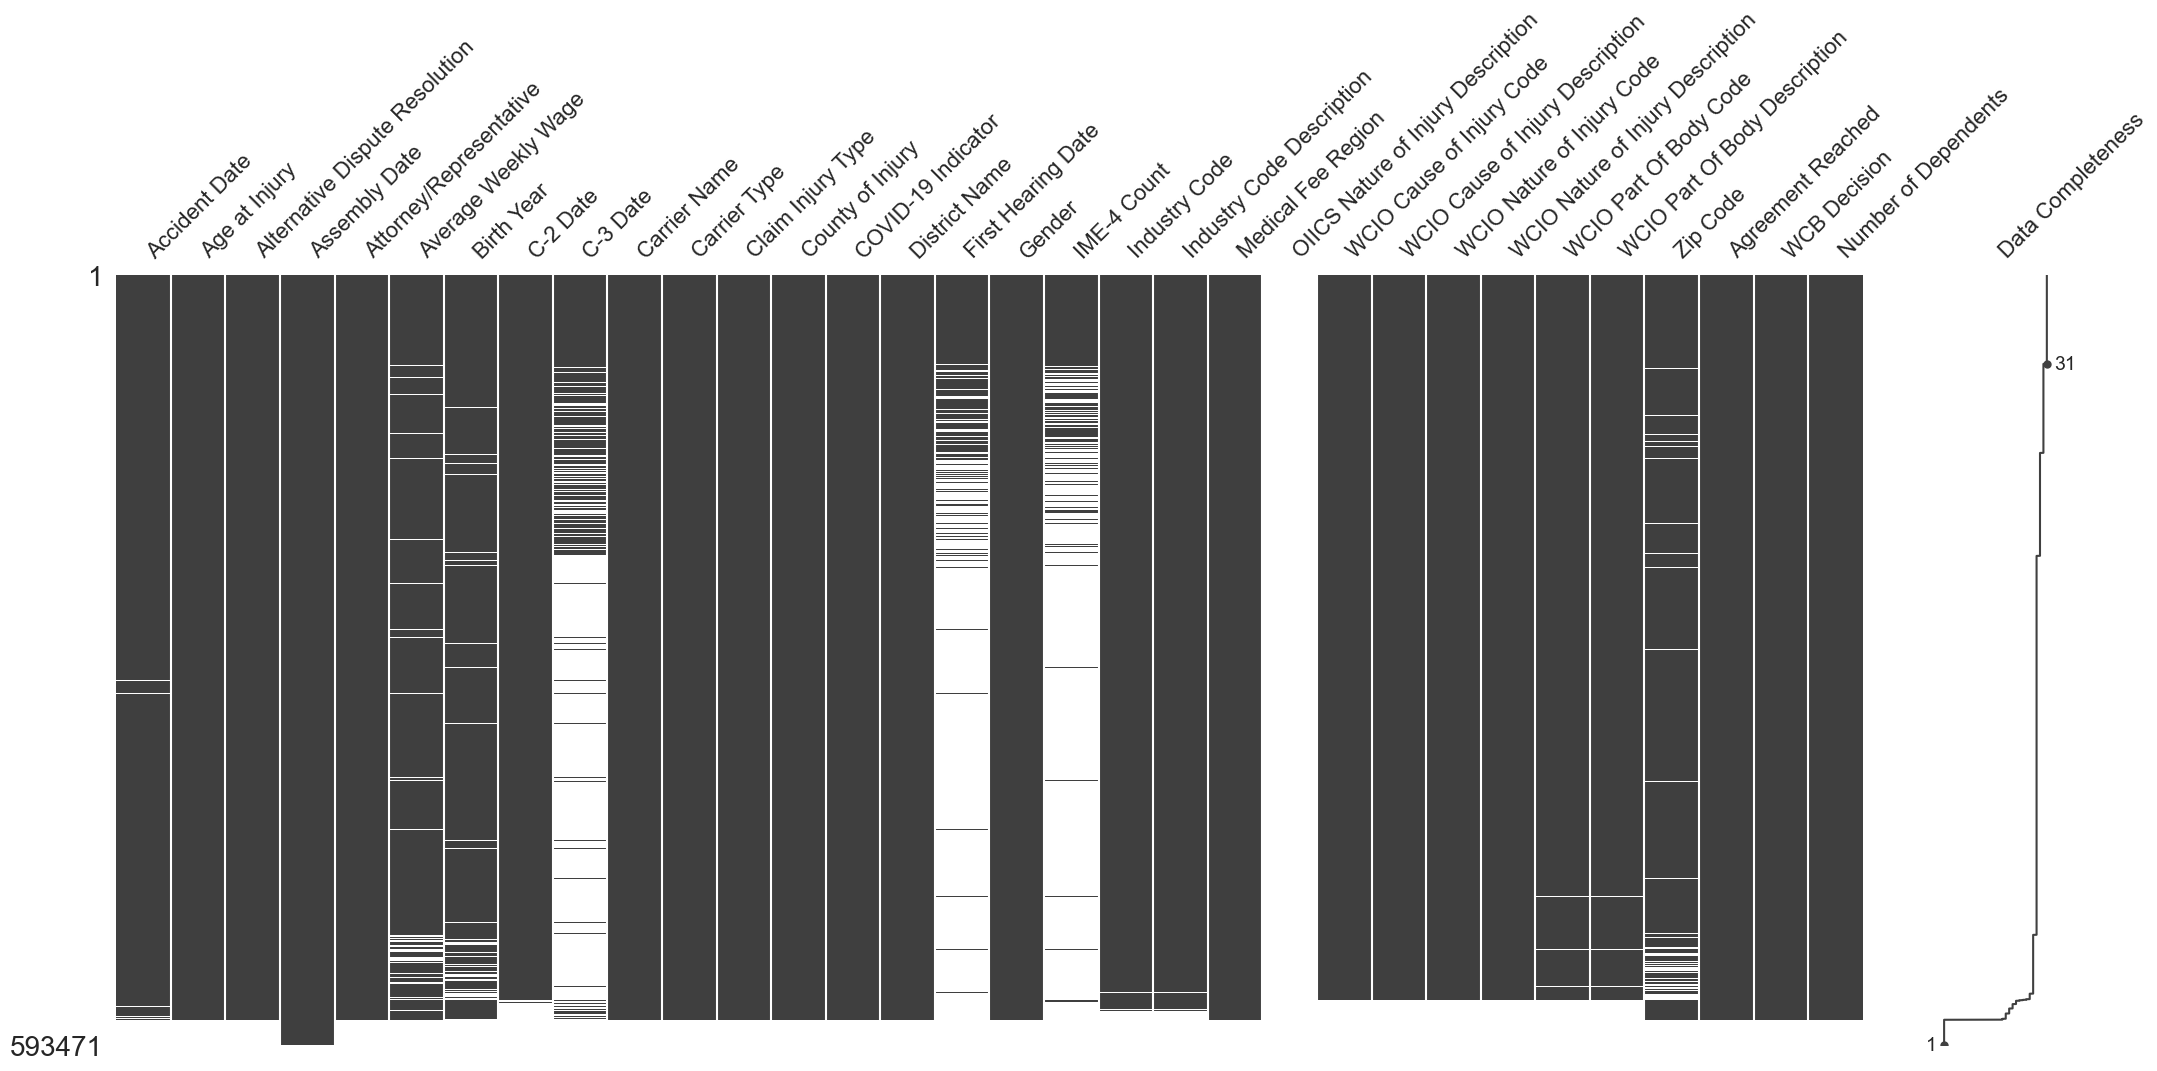

In [16]:
msno.matrix(train, labels=True, sort="descending")

<Axes: >

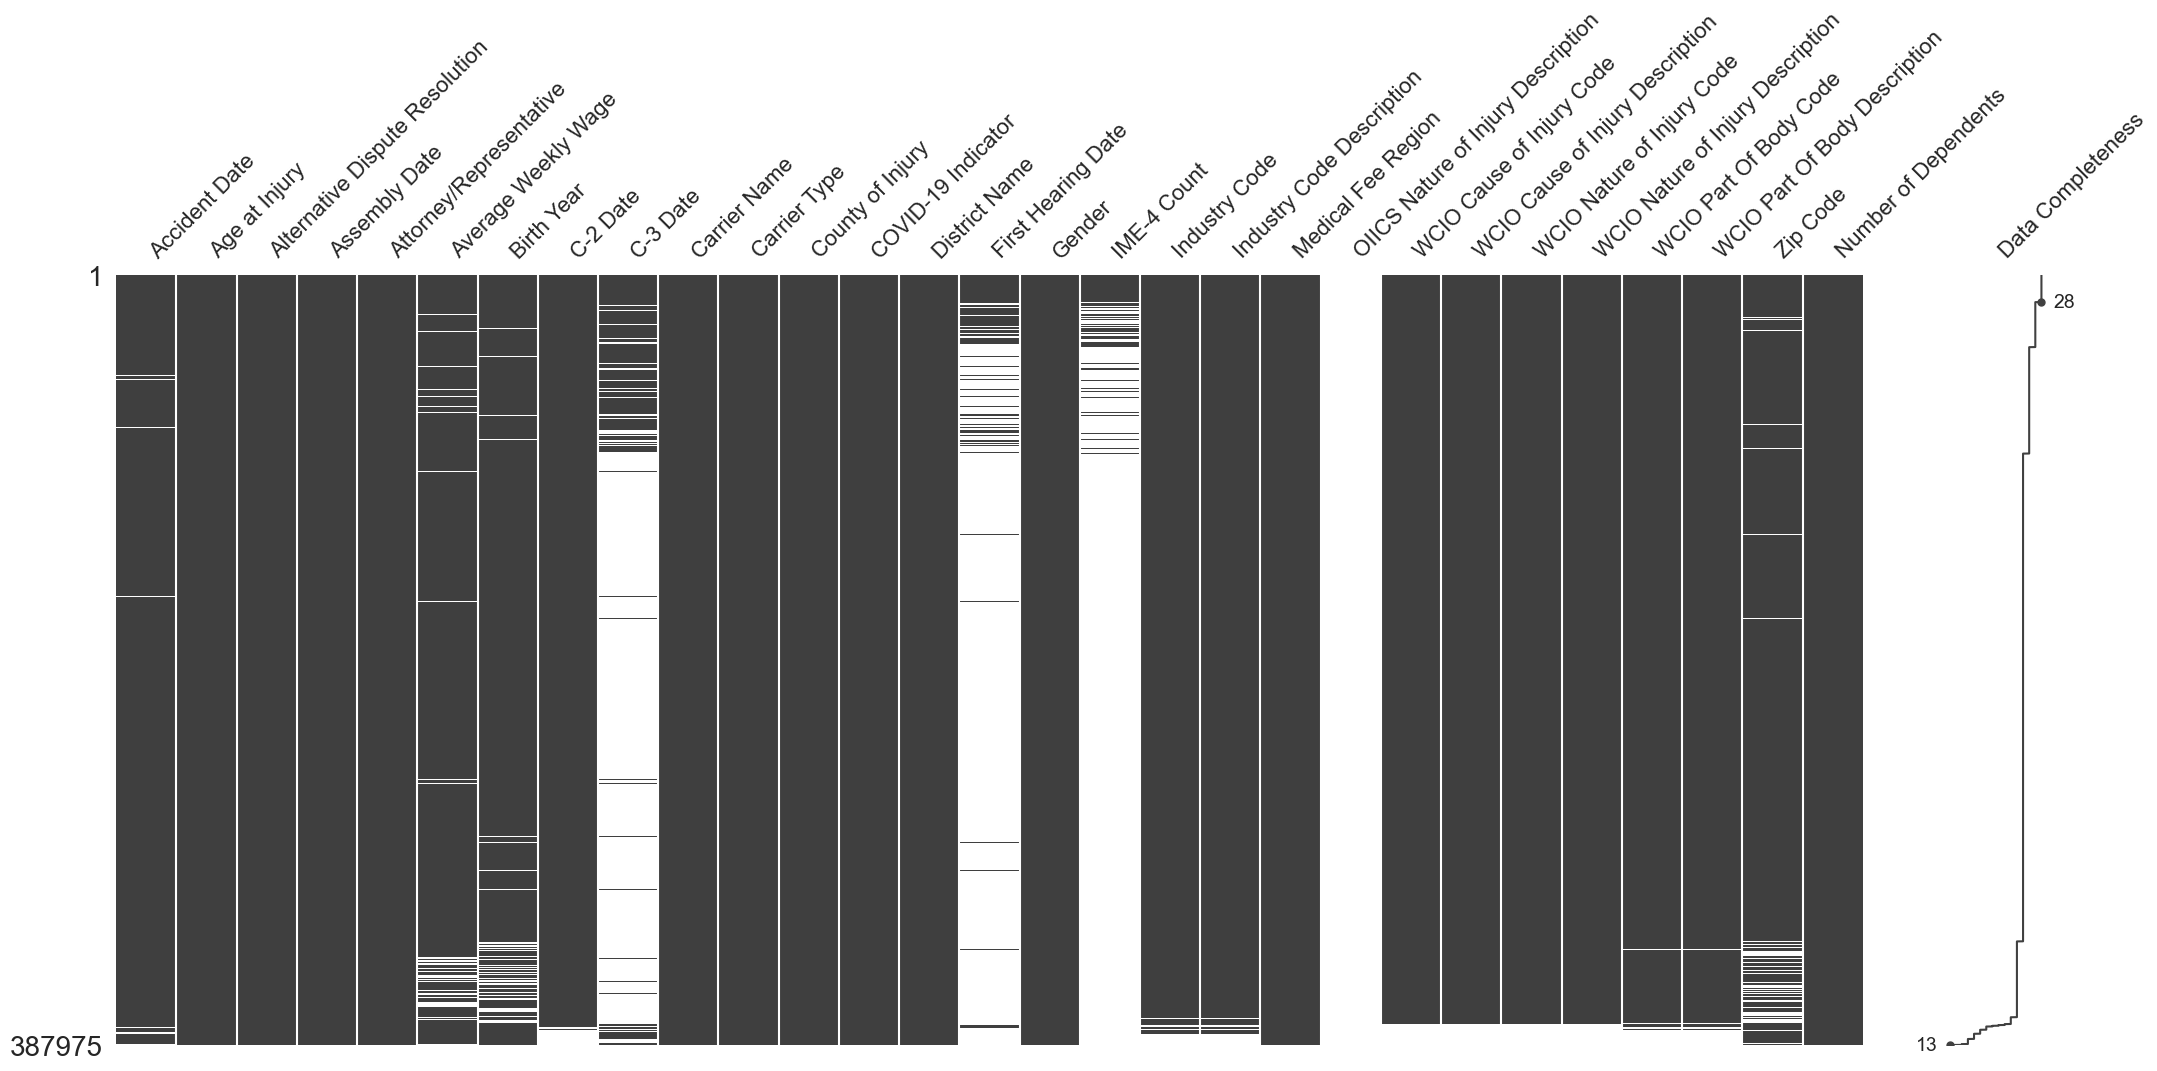

In [17]:
msno.matrix(test, labels=True, sort="descending")

In [18]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (593471, 32)
Test dimensions: (387975, 29)


In [19]:
# Eliminates rows with only 1, 2 or 3 different NaN values, as we see that 
# the 'C-3 Date', 'First Hearing Date' and 'IME-4 Count' columns have +- 70% of the values ​​missing
train = train.dropna(thresh=4)
test = test.dropna(thresh=4)

In [20]:
strange_values_list = ["!","$","%","?","*","+","_","@","€"," ","{"]
train.replace(strange_values_list,np.nan, inplace=True)

In [21]:
train.isna().sum()

Accident Date                           3689
Age at Injury                              0
Alternative Dispute Resolution             0
Assembly Date                              0
Attorney/Representative                    0
Average Weekly Wage                    28651
Birth Year                             29078
C-2 Date                               14560
C-3 Date                              386781
Carrier Name                               0
Carrier Type                               0
Claim Injury Type                          0
County of Injury                           0
COVID-19 Indicator                         0
District Name                              0
First Hearing Date                    423228
Gender                                     0
IME-4 Count                           441223
Industry Code                           9958
Industry Code Description               9958
Medical Fee Region                         0
OIICS Nature of Injury Description    574026
WCIO Cause

#### OIICS Nature of Injury Description

In [22]:
# Delete the column with all missing values
train.drop('OIICS Nature of Injury Description', inplace = True, axis = 1)
test.drop('OIICS Nature of Injury Description', inplace = True, axis = 1)

#### Agreement Reached

In [23]:
# its not on the test dataset
train.drop('Agreement Reached', axis=1, inplace=True)

In [24]:
print("Train dimensions:", train.shape)
print("Test dimensions:", test.shape)

Train dimensions: (574026, 30)
Test dimensions: (387975, 28)


#### WCB Decision

In [25]:
#all values are the same, and its not on the test dataset
train.drop('WCB Decision', inplace = True, axis = 1)

In [26]:
# Eliminates rows with only 1, 2 or 3 different NaN values, as we see that 
# the 'C-3 Date', 'First Hearing Date' and 'IME-4 Count' columns have +- 70% of the values ​​missing
train = train.dropna(thresh=4)
test = test.dropna(thresh=4)

In [27]:
train.isna().sum()

Accident Date                          3689
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                            29078
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                   423228
Gender                                    0
IME-4 Count                          441223
Industry Code                          9958
Industry Code Description              9958
Medical Fee Region                        0
WCIO Cause of Injury Code             15640
WCIO Cause of Injury Description

#### IME-4 Count  

In [28]:
train['IME-4 Count'].describe()

count    132803.000000
mean          3.207337
std           2.832303
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          73.000000
Name: IME-4 Count, dtype: float64

In [29]:
# as min is = 1 we can supose that NaNs are cases where there were no forms and so we assume NaN = 0
train['IME-4 Count'].fillna(0, inplace= True)
test['IME-4 Count'].fillna(0, inplace=True)

#### First Hearing Date

In [30]:
# turn into boolean, if it has had a hearing date = 1, if not = 0
train['First Hearing Date'] = train['First Hearing Date'].map(lambda x: 1 if x != np.nan else 0)
test['First Hearing Date'] = test['First Hearing Date'].map(lambda x: 1 if x != np.nan else 0)

#### Birth Year

In [31]:
train['Accident Year'] = train['Accident Date'].map(lambda x: int(x.split('-')[0]) if not pd.isnull(x) else 0)
train['Birth_Year_2'] = train['Accident Year'] - train['Age at Injury']
train['Birth Year'] = train['Birth Year'].fillna(train['Birth_Year_2'])
train.drop(['Accident Year', 'Birth_Year_2'], axis=1, inplace=True)
test['Accident Year'] = test['Accident Date'].map(lambda x: int(x.split('-')[0]) if not pd.isnull(x) else 0)
test['Birth_Year_2'] = test['Accident Year'] - test['Age at Injury']
test['Birth Year'] = test['Birth Year'].fillna(test['Birth_Year_2'])
test.drop(['Accident Year', 'Birth_Year_2'], axis=1, inplace=True)

In [32]:
train['WCIO Cause of Injury Code'].value_counts()

WCIO Cause of Injury Code
56.0    46610
74.0    37153
60.0    33192
31.0    31733
29.0    29364
        ...  
91.0       55
14.0       51
40.0       45
8.0        34
47.0       12
Name: count, Length: 77, dtype: int64

#### Rest

In [ ]:
train.drop(['C-2 Date', 'C-3 Date'], axis = 1, inplace = True)
test.drop(['C-2 Date', 'C-3 Date'], axis = 1, inplace = True)
tr

#### Claim Injury Type

In [33]:
train.dropna(subset=['Claim Injury Type'], inplace=True)
train['Claim Injury Type']

Claim Identifier
5393875     2. NON-COMP
5393091    4. TEMPORARY
5393889    4. TEMPORARY
5393887     2. NON-COMP
5393863     3. MED ONLY
               ...     
6165265     2. NON-COMP
6165285     2. NON-COMP
6165506    4. TEMPORARY
6165339     2. NON-COMP
6165075     2. NON-COMP
Name: Claim Injury Type, Length: 574026, dtype: object

In [34]:
train.isna().sum()

Accident Date                          3689
Age at Injury                             0
Alternative Dispute Resolution            0
Assembly Date                             0
Attorney/Representative                   0
Average Weekly Wage                   28651
Birth Year                                0
C-2 Date                              14560
C-3 Date                             386781
Carrier Name                              0
Carrier Type                              0
Claim Injury Type                         0
County of Injury                          0
COVID-19 Indicator                        0
District Name                             0
First Hearing Date                        0
Gender                                    0
IME-4 Count                               0
Industry Code                          9958
Industry Code Description              9958
Medical Fee Region                        0
WCIO Cause of Injury Code             15640
WCIO Cause of Injury Description

In [35]:
train['Claim Injury Type Num'] = train['Claim Injury Type'].str.extract('(\d+)').astype(int)
train['Claim Injury Type Num'].unique()

array([2, 4, 3, 5, 6, 1, 8, 7])

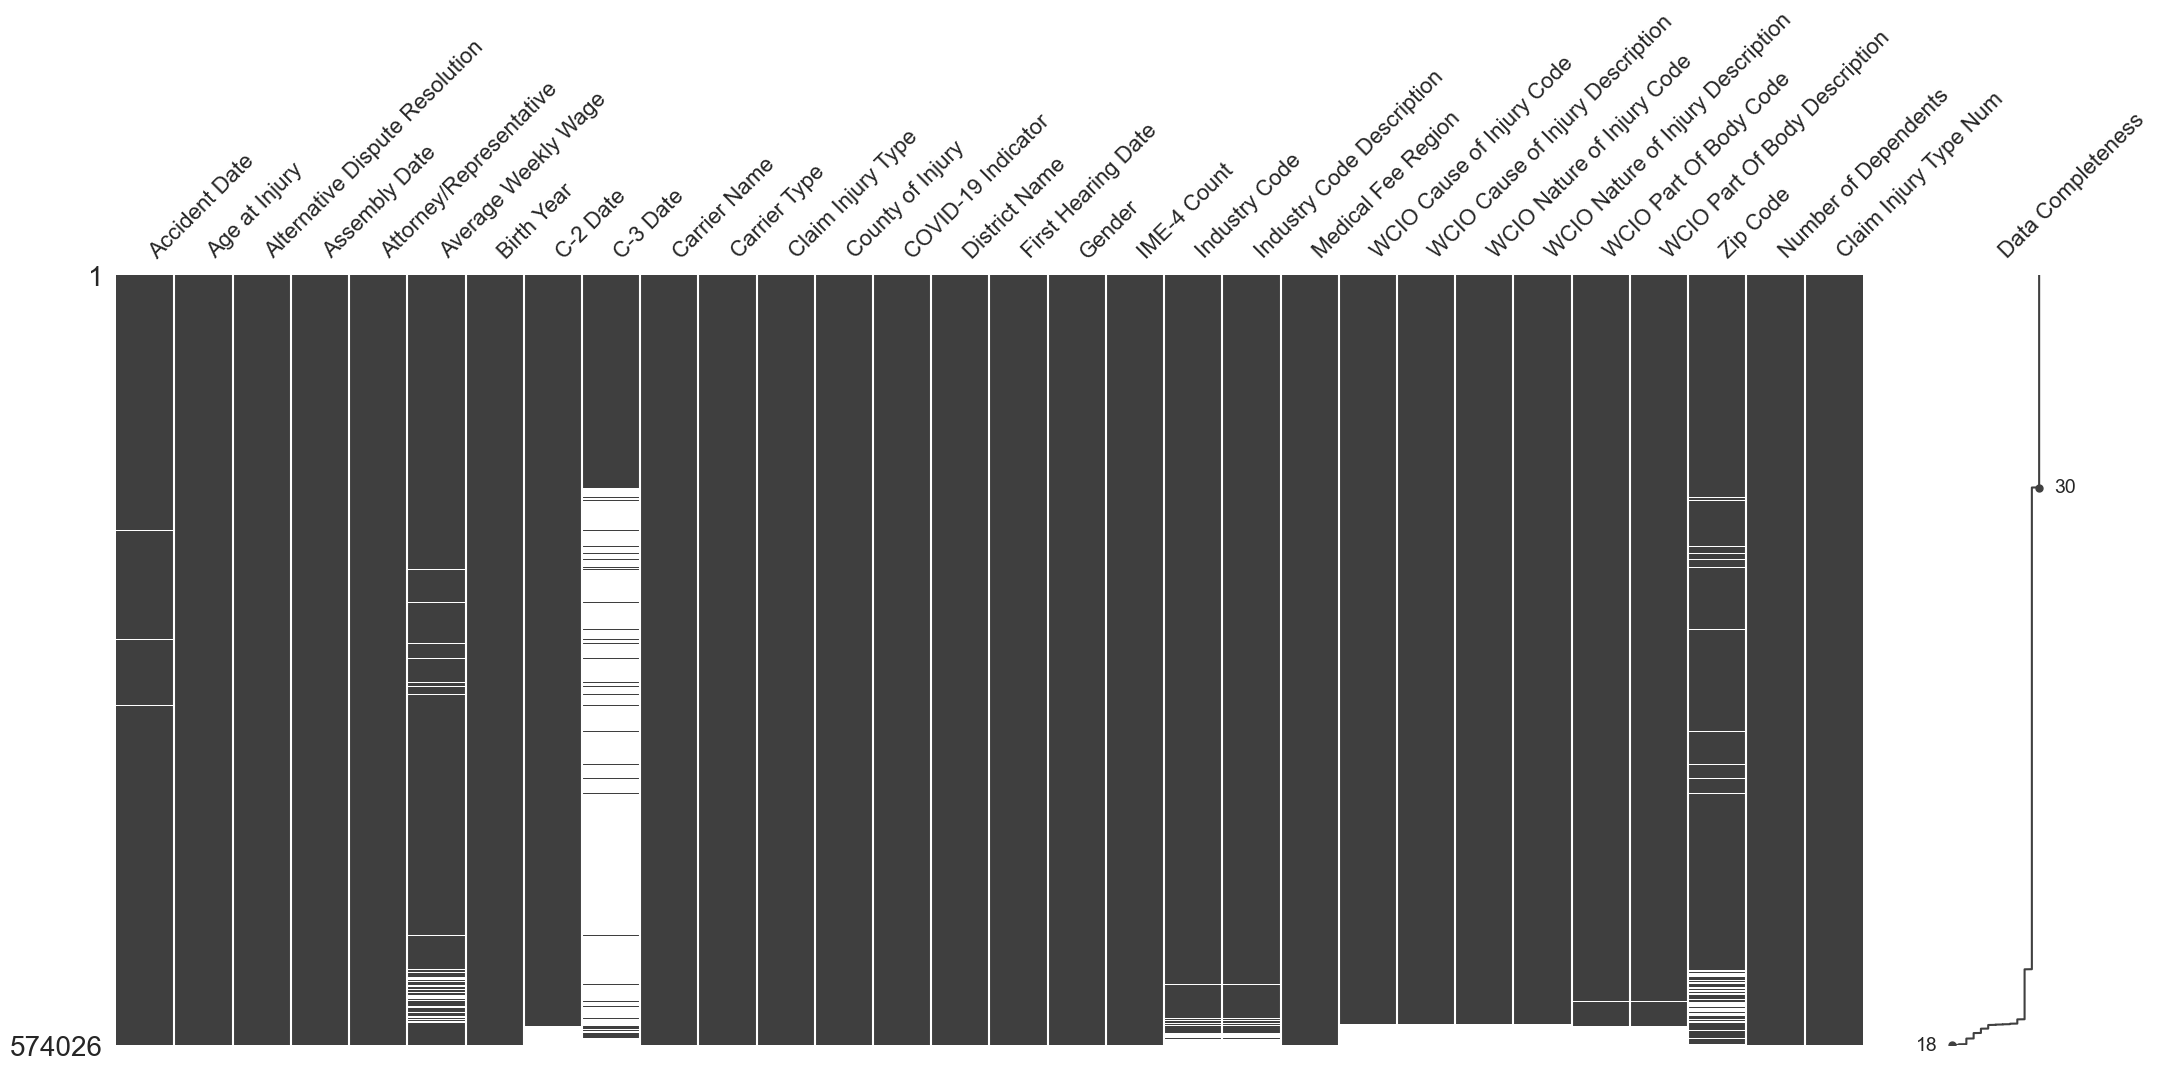

In [36]:
msno.matrix(train, labels=True, sort="descending");

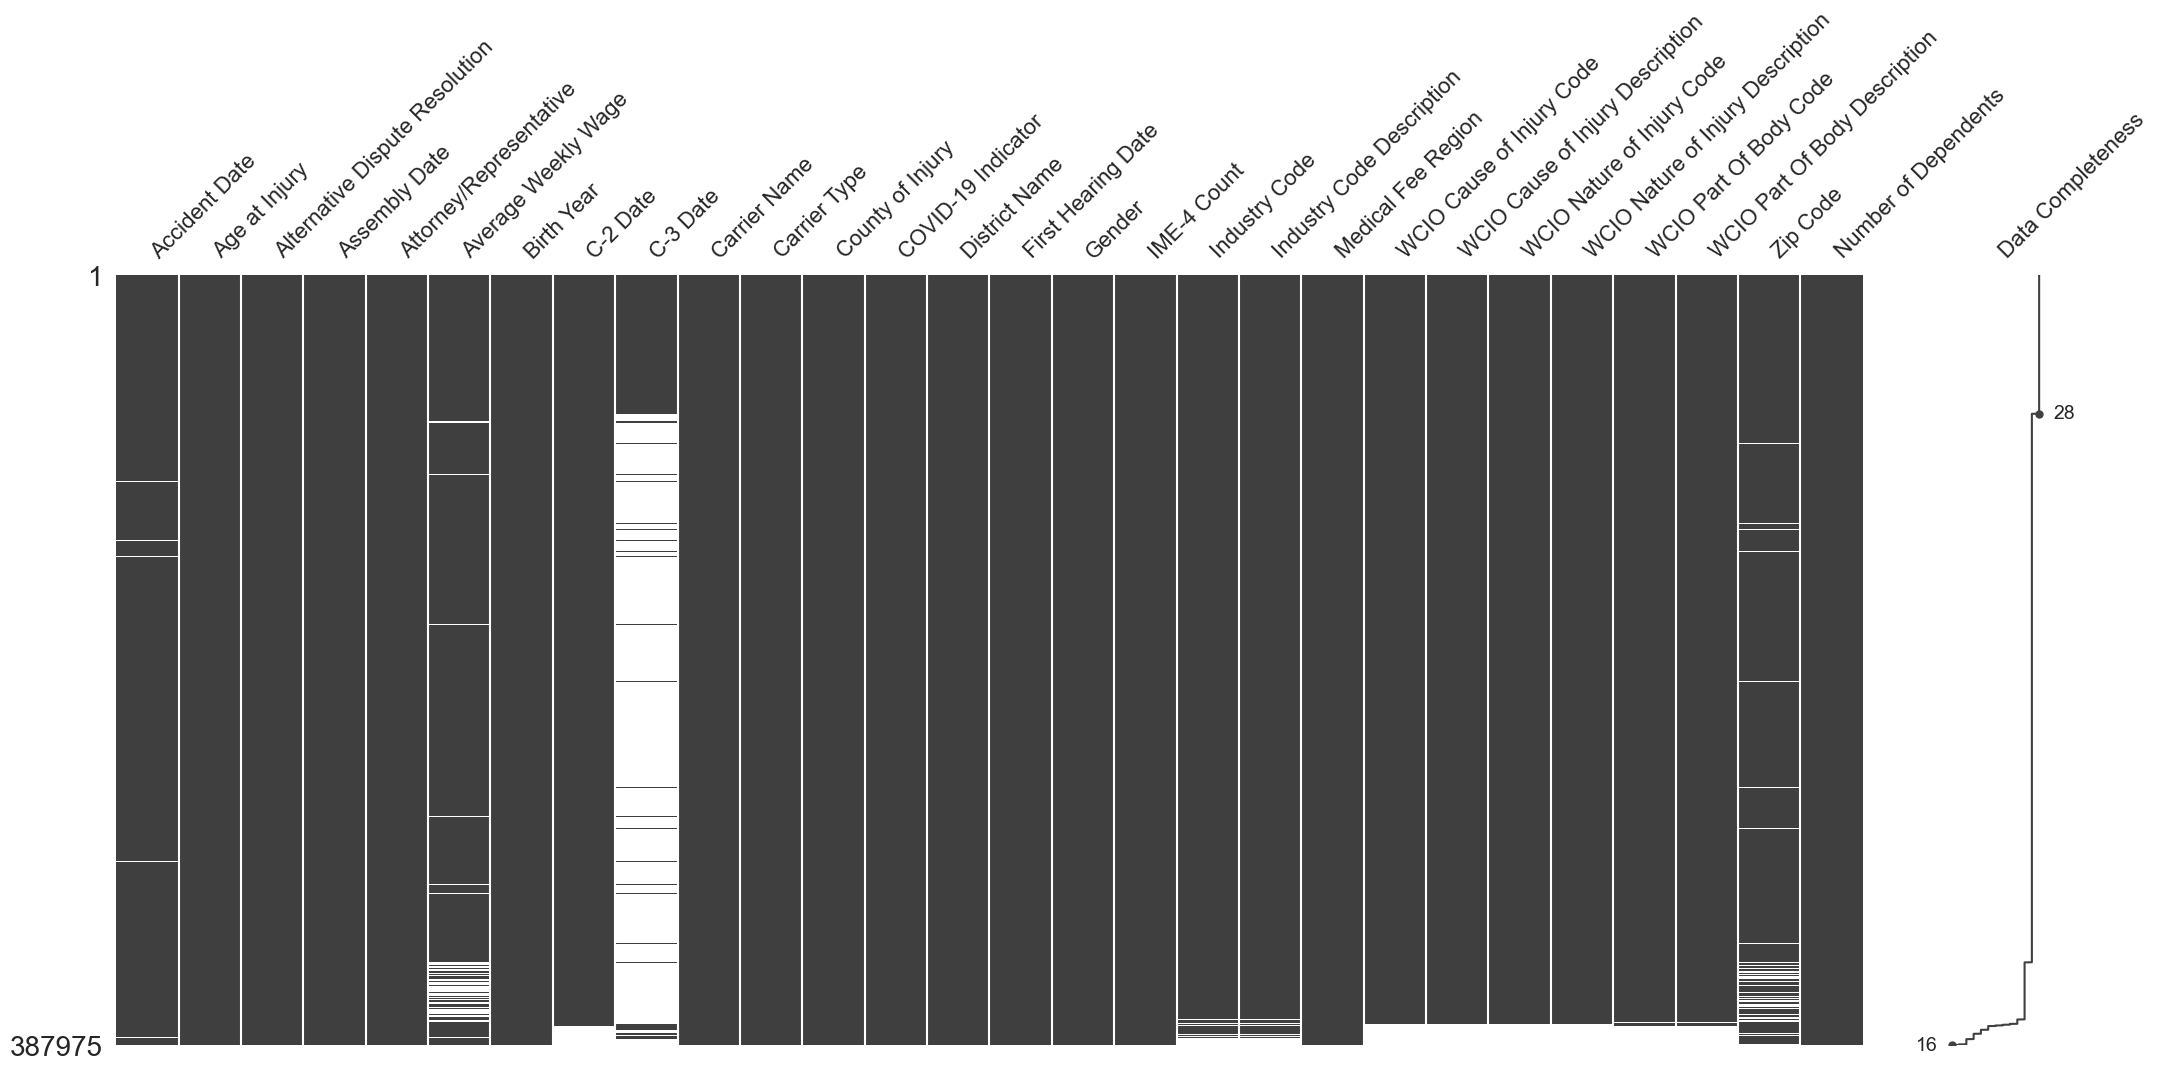

In [37]:
msno.matrix(test, labels=True, sort="descending");

## Further Analysis

In [38]:
print('youngest person was born in:',train['Birth Year'].max())
print('oldest injured:',train['Age at Injury'].max())
print('most dependents:',train['Number of Dependents'].max())

youngest person was born in: 2022.0
oldest injured: 117.0
most dependents: 6.0


In [39]:
columns_name = train.columns
for i in columns_name:
    print(i)
    print(train[i].unique())
    print(train[i].value_counts())
    print('\n')

Accident Date
['2019-12-30' '2019-08-30' '2019-12-06' ... '2000-05-24' '2007-05-01'
 '1980-05-17']
Accident Date
2020-03-01    1245
2020-12-18    1001
2022-02-07     977
2022-01-05     883
2021-02-18     851
              ... 
2017-05-17       1
2015-05-28       1
2002-08-18       1
2017-09-01       1
1980-05-17       1
Name: count, Length: 5539, dtype: int64


Age at Injury
[ 31.  46.  40.  61.  67.  48.  33.  55.  20.  21.  51.  62.  35.  54.
  32.  34.  38.  30.  36.  39.  44.  56.  29.  60.  49.  50.  18.  58.
  24.  45.  53.  52.  47.  25.  23.  22.  64.  70.  41.  69.  57.  27.
  42.  77.  72.  19.  28.  63.  65.  59.  43.  26.  74.  66.  76.  68.
  37.   0.  16.  71.  82.  75.  17.  78.  73.  89.  85.  84.  81.  87.
  80.  11.  88.  79.  15.  83.  86.  90.   1.  10. 102.  94. 117.  14.
 113.  95.  92. 104.   5.   8. 115. 110.  91.  96.  99.  12.  13.  93.
 101.   7. 111.   9.  97. 112. 109. 100.  98. 114.]
Age at Injury
31.0     14041
30.0     14022
32.0     13994
29.0     13657

#### Data Categorization

In [40]:
# Convert:
## IN DATE
train['Accident Date'] = pd.to_datetime(train['Accident Date'], errors='coerce')
train['Assembly Date'] = pd.to_datetime(train['Assembly Date'], errors='coerce')
train['C-2 Date'] = pd.to_datetime(train['C-2 Date'], errors='coerce')
train['C-3 Date'] = pd.to_datetime(train['C-3 Date'], errors='coerce')

# IN INT
train['Age at Injury'] = train['Age at Injury'].astype('Int64')
train['Birth Year'] = train['Birth Year'].astype('Int64')
train['IME-4 Count'] = train['IME-4 Count'].astype('Int64')
train['Industry Code'] = train['Industry Code'].astype('Int64')
train['WCIO Cause of Injury Code'] = train['WCIO Cause of Injury Code'].astype('Int64')
train['WCIO Nature of Injury Code'] = train['WCIO Nature of Injury Code'].astype('Int64')
train['WCIO Part Of Body Code'] = train['WCIO Part Of Body Code'].astype('Int64')
train['Number of Dependents'] = train['Number of Dependents'].astype('Int64')  

In [41]:
# Convert:
## IN DATE
test['Accident Date'] = pd.to_datetime(test['Accident Date'], errors='coerce')
test['Assembly Date'] = pd.to_datetime(test['Assembly Date'], errors='coerce')
test['C-2 Date'] = pd.to_datetime(test['C-2 Date'], errors='coerce')
test['C-3 Date'] = pd.to_datetime(test['C-3 Date'], errors='coerce')

# IN INT
test['Age at Injury'] = test['Age at Injury'].astype('Int64')
test['Birth Year'] = test['Birth Year'].astype('Int64')
test['IME-4 Count'] = test['IME-4 Count'].astype('Int64')
test['Industry Code'] = test['Industry Code'].astype('Int64')
test['WCIO Cause of Injury Code'] = test['WCIO Cause of Injury Code'].astype('Int64')
test['WCIO Nature of Injury Code'] = test['WCIO Nature of Injury Code'].astype('Int64')
test['WCIO Part Of Body Code'] = test['WCIO Part Of Body Code'].astype('Int64')
test['Number of Dependents'] = test['Number of Dependents'].astype('Int64')                   

In [42]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
 # Exclude target variable if present

#### Graphical Representaion

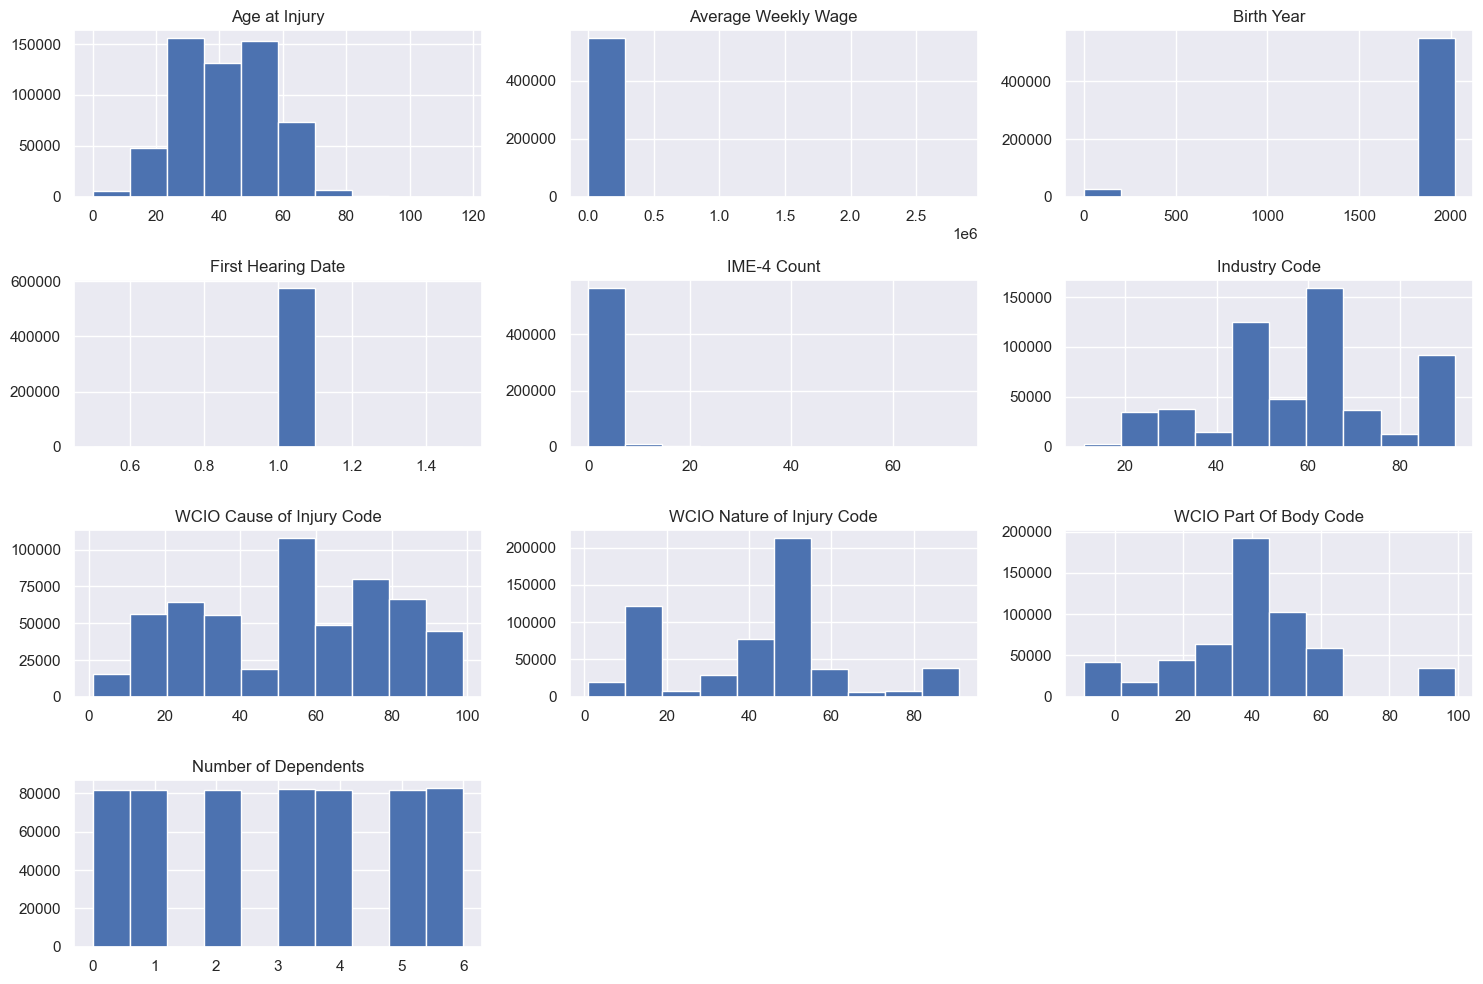

In [43]:
train[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

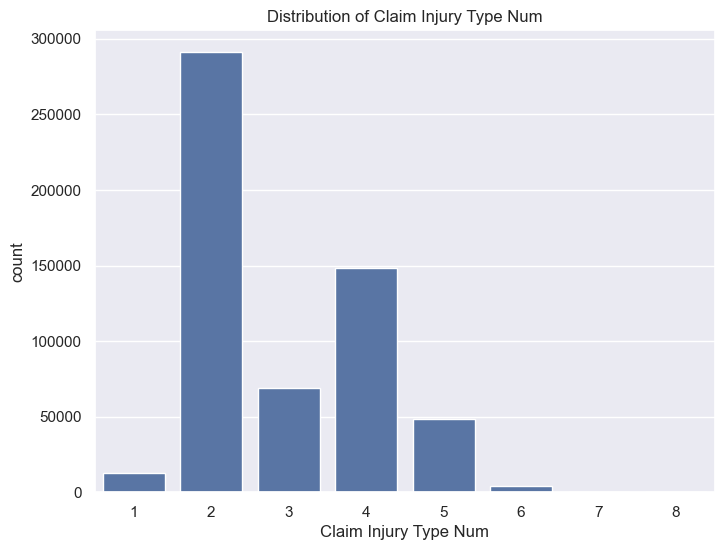

In [44]:
plt.figure(figsize=(8, 6))
sns.countplot( x= 'Claim Injury Type Num', data = train)
plt.title('Distribution of Claim Injury Type Num')
plt.show()

### Categorical Features

In [45]:
categorical_cols = set(train.select_dtypes(include=['object']).columns).difference({'Claim Injury Type', 'Carrier Name'})
print("Categorical columns:")
print(categorical_cols)

Categorical columns:
{'Medical Fee Region', 'Gender', 'Zip Code', 'District Name', 'Alternative Dispute Resolution', 'COVID-19 Indicator', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'Attorney/Representative', 'County of Injury', 'Carrier Type', 'Industry Code Description', 'WCIO Part Of Body Description'}


#### Gender

In [46]:
train['Gender'].value_counts()

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

In [47]:
train.loc[train['Gender'] == 'X', 'Gender'] = 'U'
test.loc[test['Gender'] == 'X', 'Gender'] = 'U'

In [48]:
train['Gender'].value_counts()

Gender
M    335218
F    234051
U      4757
Name: count, dtype: int64

#### Zip Codes

In [49]:
#zip codes in the US have five digits - if the zip code does not have five digits its not from the US
train['Zip Code'].value_counts()

Zip Code
11236      3302
10940      2971
11717      2807
11434      2759
11706      2728
           ... 
09603         1
13125         1
75038.0       1
14507.0       1
07122         1
Name: count, Length: 10060, dtype: int64

In [50]:
#classifiy them as Non-US residents
train['Zip Code'] = train['Zip Code'].apply(lambda x: x[:2] if isinstance(x, str) and len(x) == 5 and x.isdigit() else 'Non-US Citizen')

In [51]:
#zip codes that start with 1 come from NY state - where the data set is based
# we decide to divide those that are from NY from those that even though are US residents, are not from NY
def transform_zip_code(df):
    df['Zip Code'] = np.where((df['Zip Code'] != 'Unknown') 
                              & (df['Zip Code'] != 'Non-US Citizen') & df['Zip Code'].str.startswith('1'), 'NY Citizen', 
                              np.where((df['Zip Code'] != 'Unknown') & (df['Zip Code'] != 'Non-US Citizen'), 
                                       'Non-NY US Citizens', df['Zip Code']))
    return df

train = transform_zip_code(train)
test = transform_zip_code(test)

In [52]:
train['Zip Code'].value_counts()

Zip Code
NY Citizen            503921
Non-US Citizen         44011
Non-NY US Citizens     26094
Name: count, dtype: int64

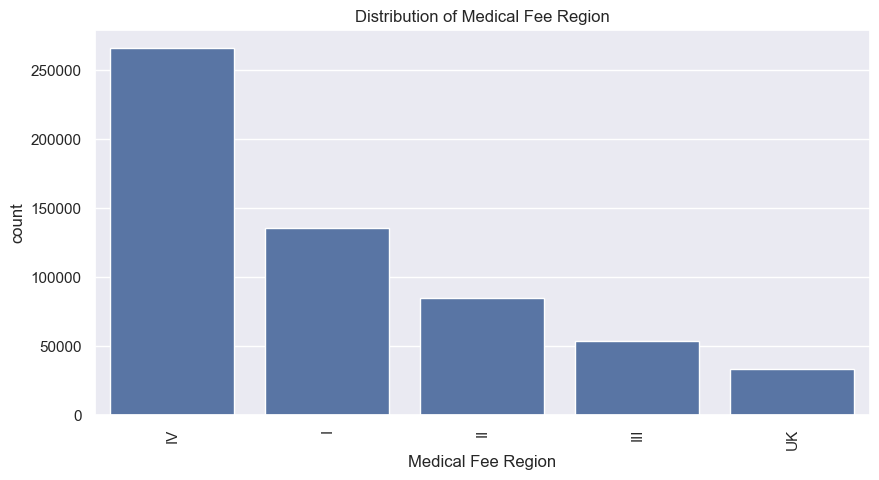

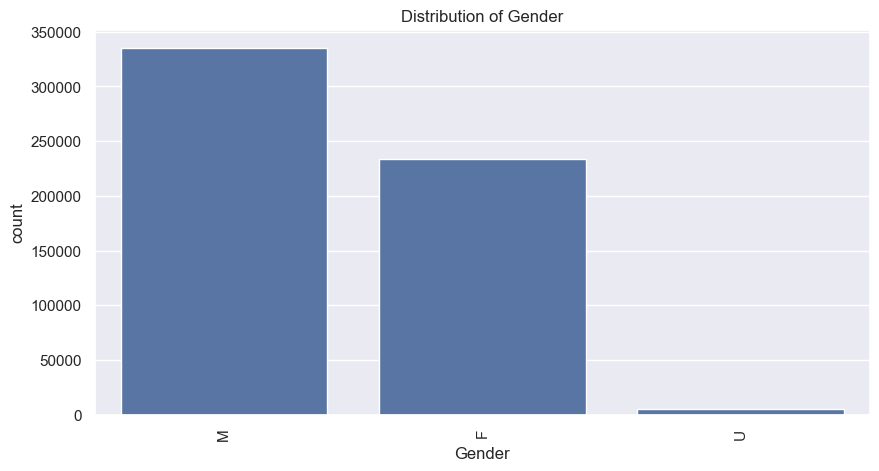

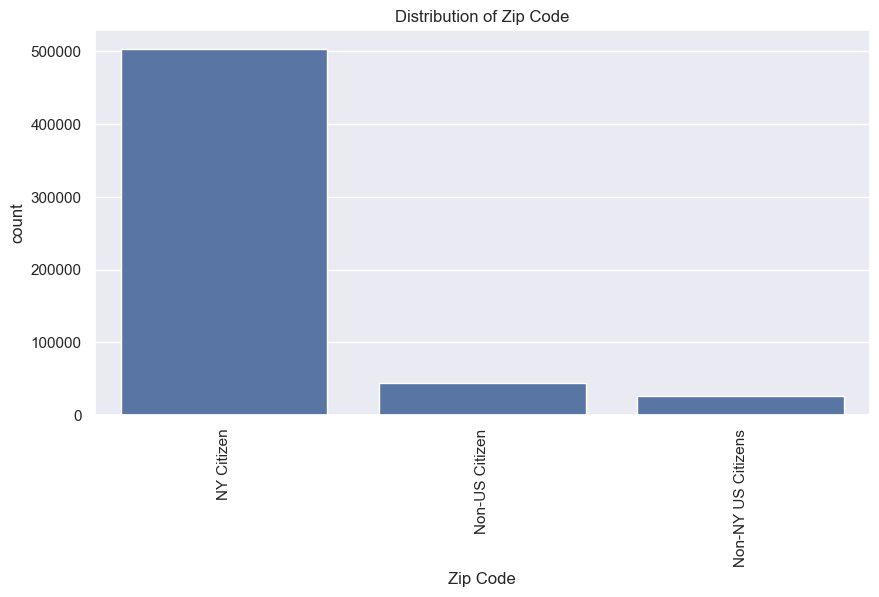

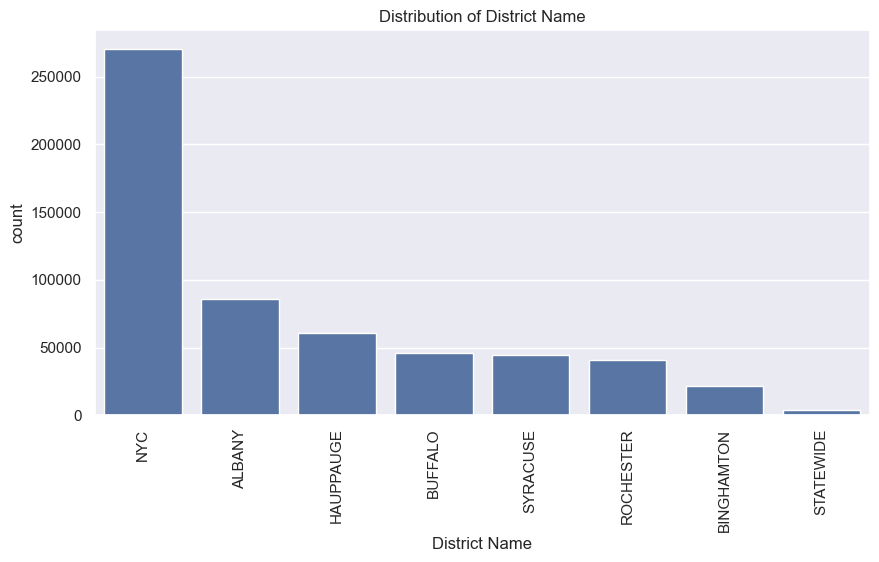

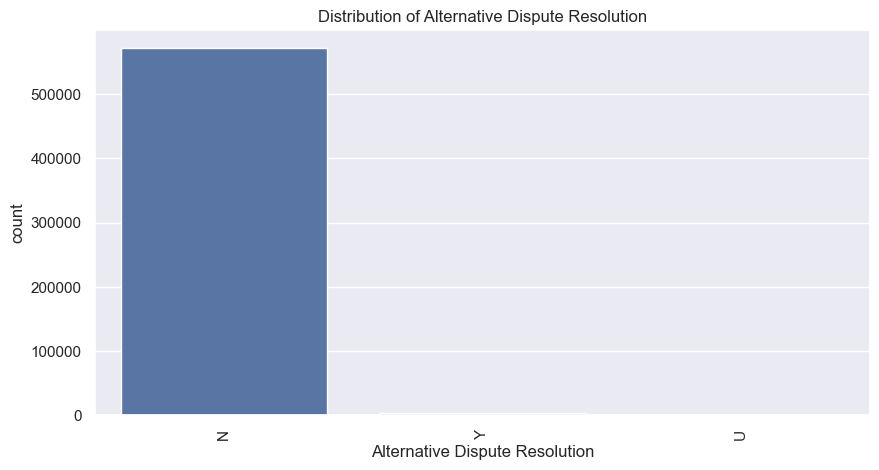

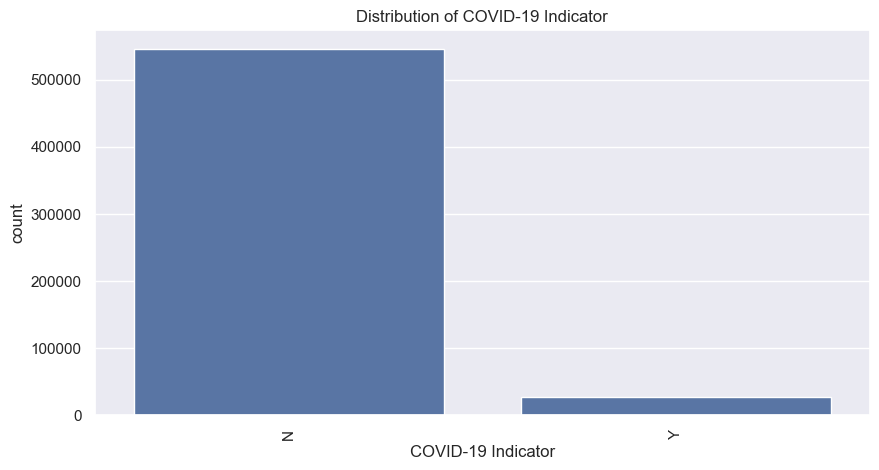

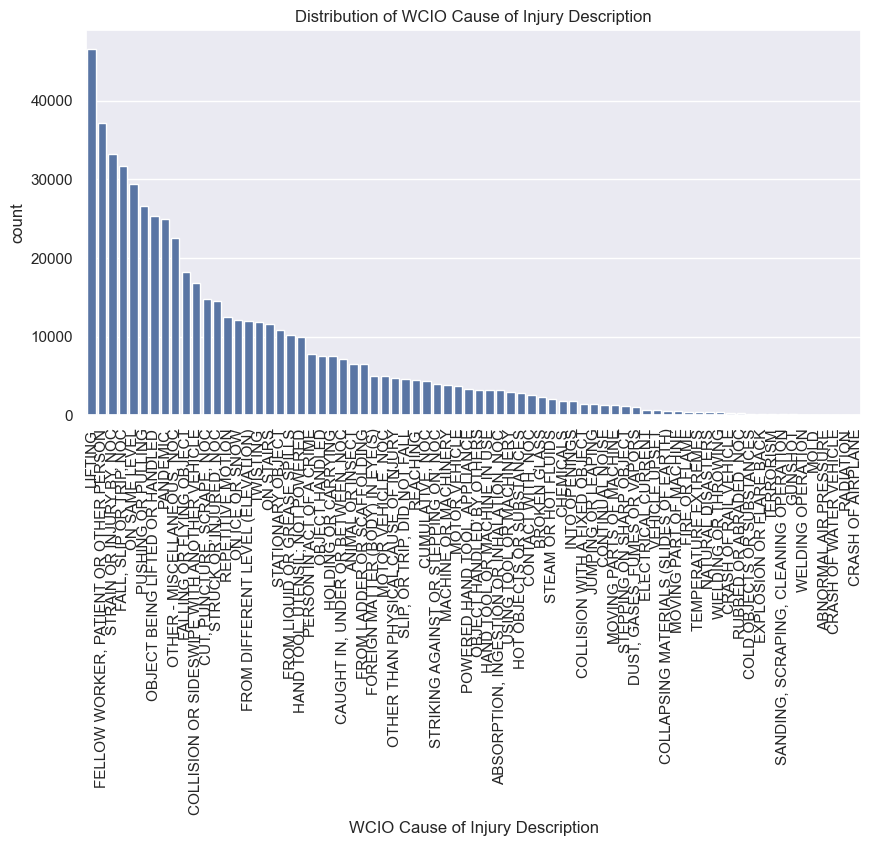

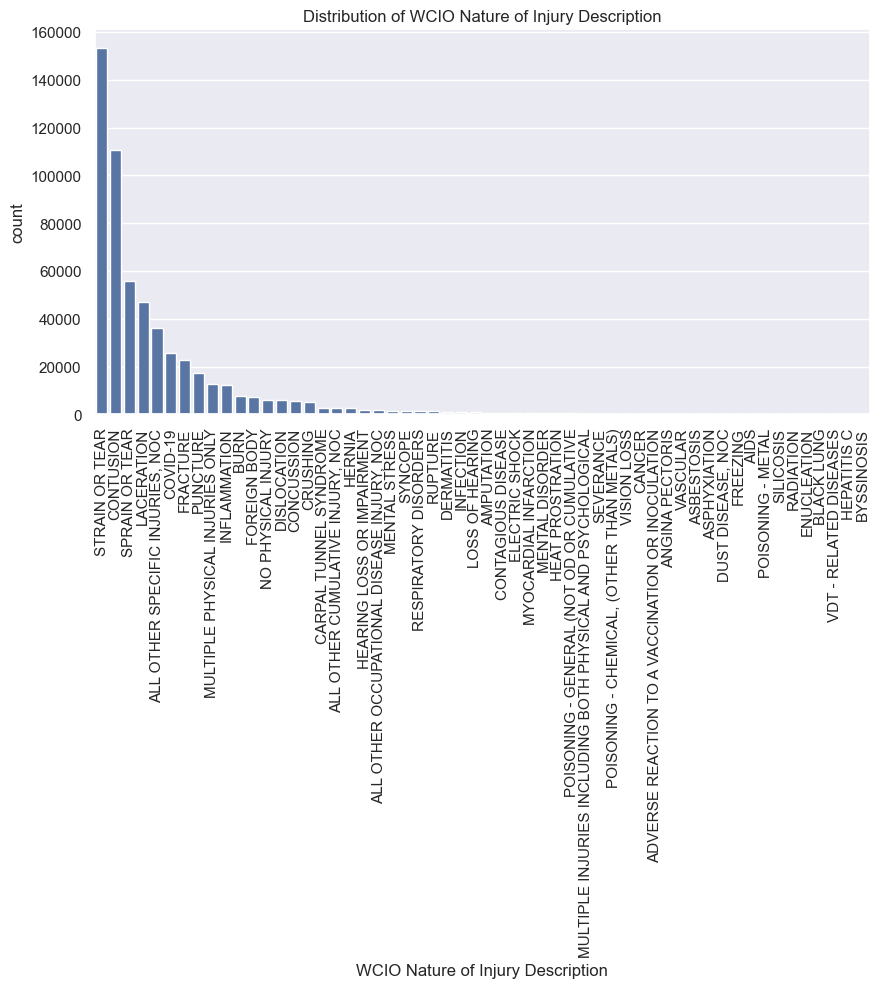

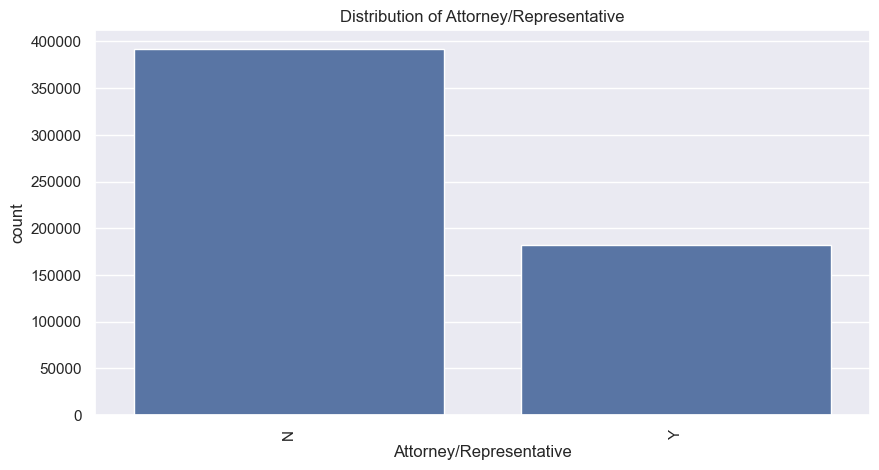

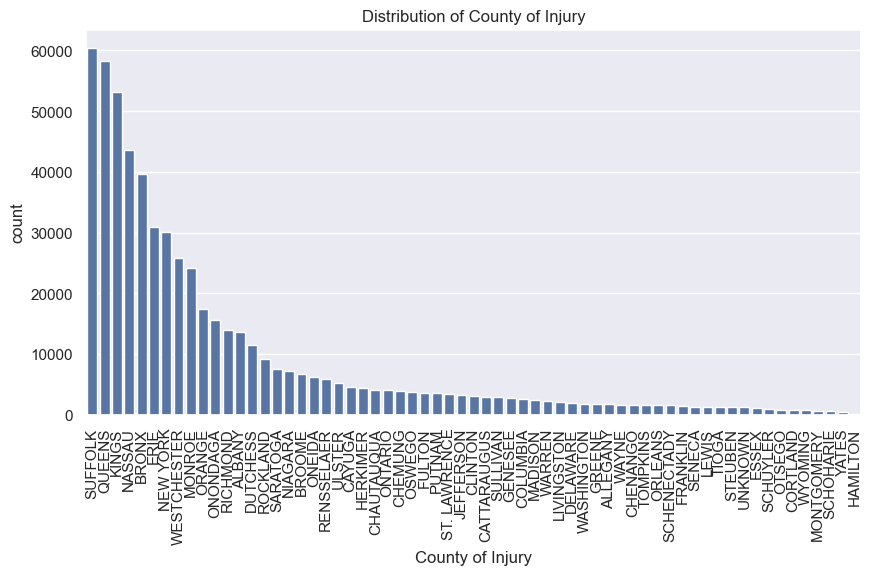

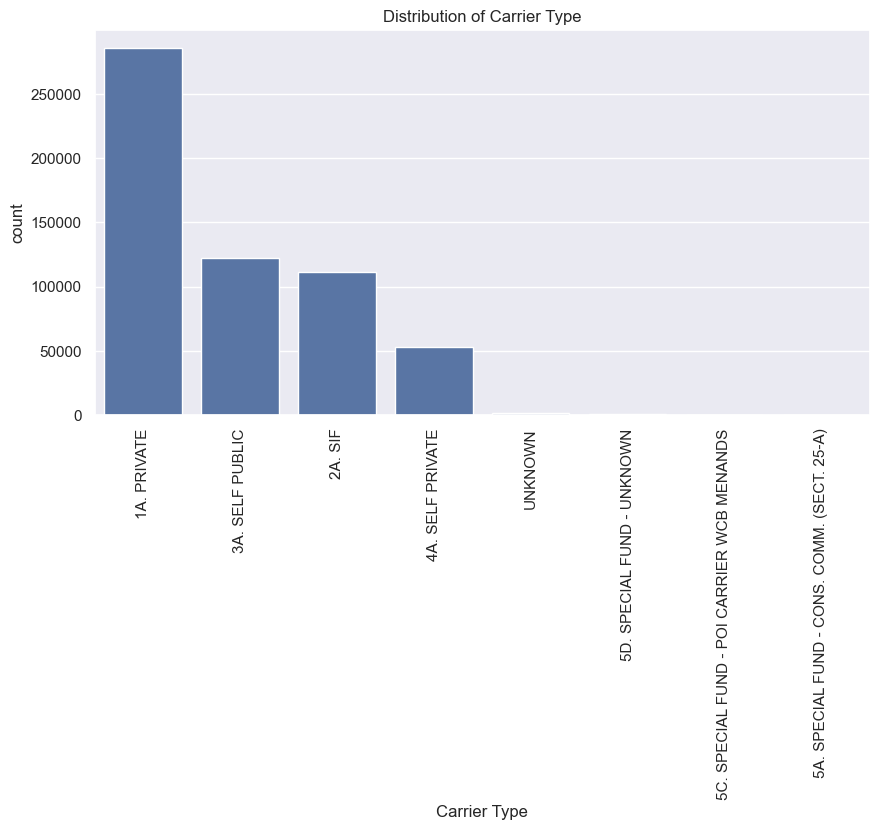

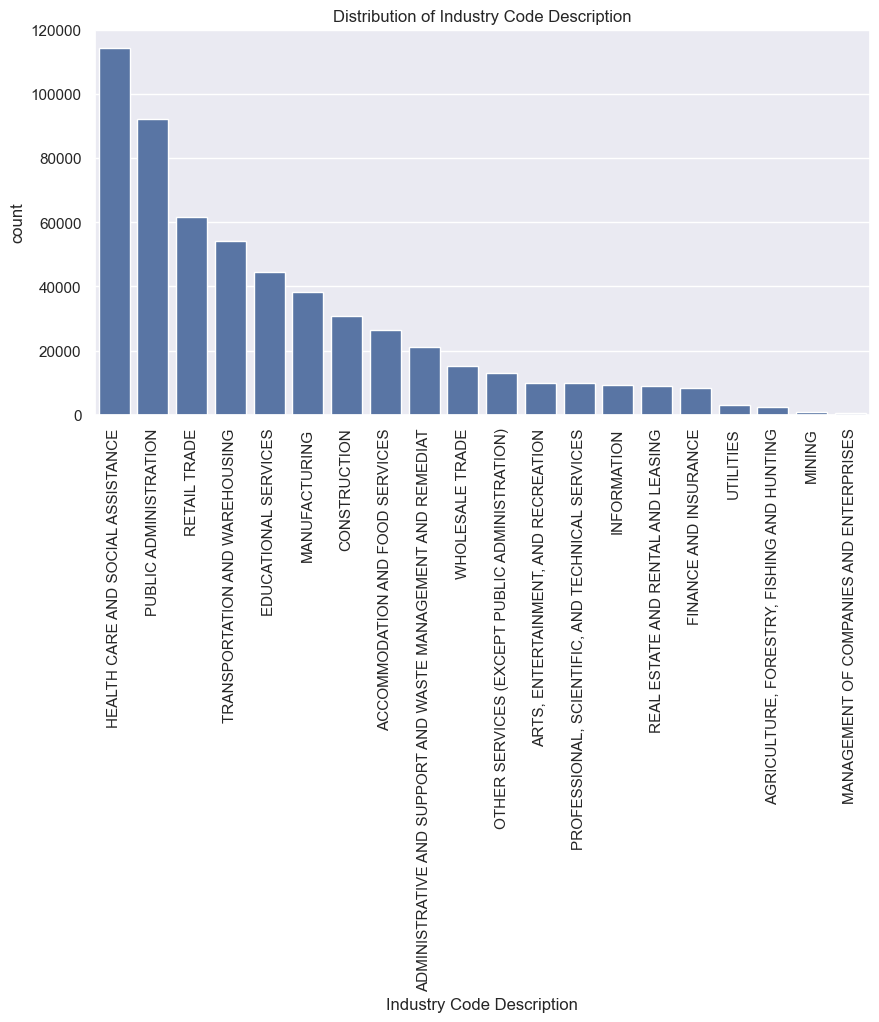

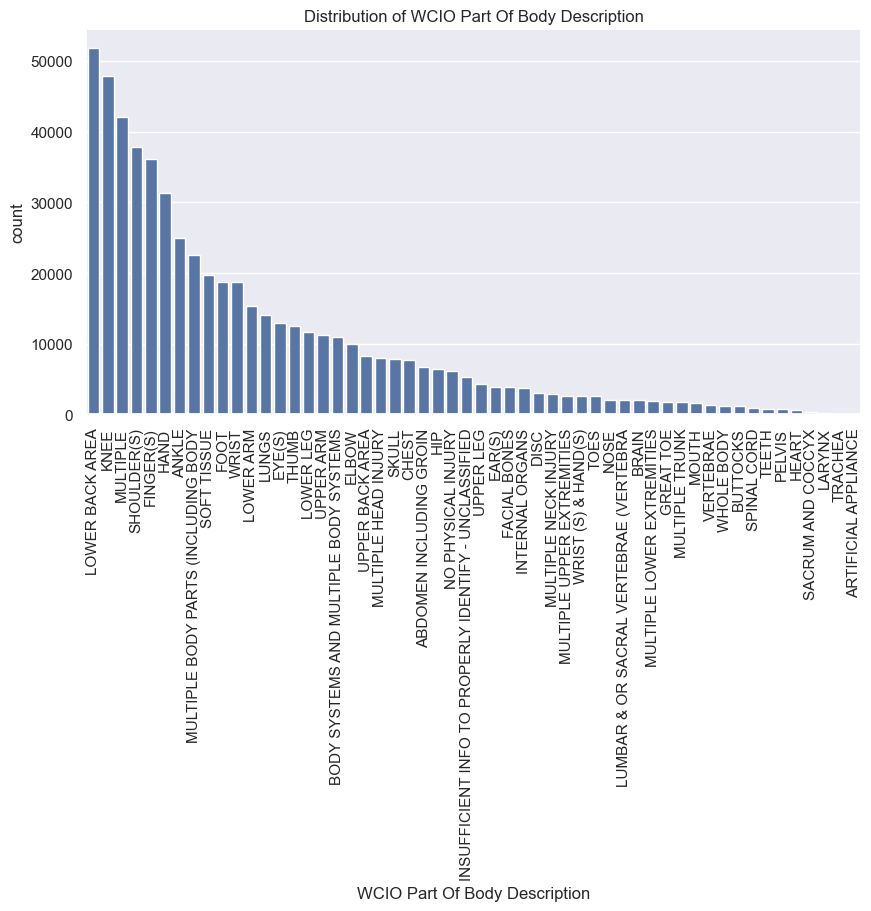

In [53]:
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=train, x=col, order=train[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col}')
    plt.show()

#### Chi-Square

In [54]:
def TestIndependence(X,y,col,alpha=0.01):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result= p, "{0} is IMPORTANT for Prediction".format(col)
    else:
        result=p, "{0} is NOT an important predictor. (Discard {0} from model)".format(col)
    print(result)

In [55]:
for col in categorical_cols:
    TestIndependence(train[col], train['Claim Injury Type Num'], col)    

(0.0, 'Medical Fee Region is IMPORTANT for Prediction')
(0.0, 'Gender is IMPORTANT for Prediction')
(2.877160520570064e-116, 'Zip Code is IMPORTANT for Prediction')
(0.0, 'District Name is IMPORTANT for Prediction')
(0.0, 'Alternative Dispute Resolution is IMPORTANT for Prediction')
(0.0, 'COVID-19 Indicator is IMPORTANT for Prediction')
(0.0, 'WCIO Cause of Injury Description is IMPORTANT for Prediction')
(0.0, 'WCIO Nature of Injury Description is IMPORTANT for Prediction')
(0.0, 'Attorney/Representative is IMPORTANT for Prediction')
(0.0, 'County of Injury is IMPORTANT for Prediction')
(0.0, 'Carrier Type is IMPORTANT for Prediction')
(0.0, 'Industry Code Description is IMPORTANT for Prediction')
(0.0, 'WCIO Part Of Body Description is IMPORTANT for Prediction')


#### Weight Visualization

In [56]:
all_categorical = train[list(categorical_cols) + ['Claim Injury Type Num']]

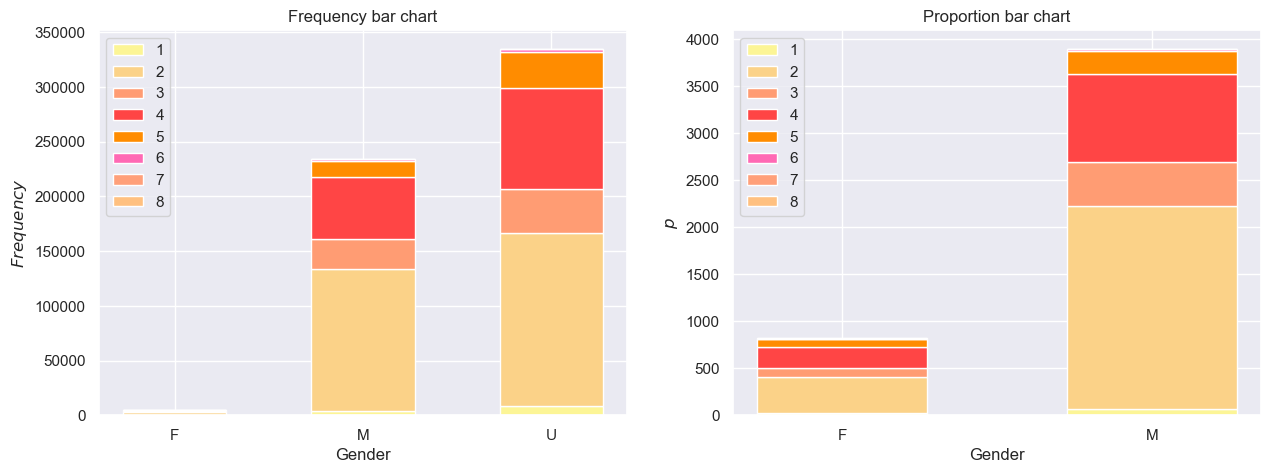

In [57]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins=True)
    categories = cont_tab.index[:-1]

    fig = plt.figure(figsize=(15, 5))

    plt.subplot(121)
    colors = ["#FCF596", "#FBD288", "#FF9C73", "#FF4545", "#FF8C00", "#FF69B4", "#FFA07A", "#FFC080"]  
    cont_tab_sorted = cont_tab.iloc[:-1, :-1].sort_values(by=[cont_tab.columns[0], cont_tab.columns[1], cont_tab.columns[2], cont_tab.columns[3], cont_tab.columns[4], cont_tab.columns[5], cont_tab.columns[6], cont_tab.columns[7]])
    p = []
    for i in range(8):
        p.append(plt.bar(categories, cont_tab_sorted.iloc[:, i].values, 0.55, bottom=[sum(cont_tab_sorted.iloc[j, :i].values) for j in range(len(categories))], color=colors[i]))
    plt.legend([p[i][0] for i in range(8)], [cont_tab.columns[i] for i in range(8)])
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    plt.subplot(122)
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, i].values, cont_tab.iloc[:-1, 7].values) for i in range(8)])
    obs_pct_sorted = obs_pct[:, np.argsort(obs_pct[0])]
    for i in range(8):
        plt.bar(categories, obs_pct_sorted[i], 0.55, bottom=[sum(obs_pct_sorted[:i, j]) for j in range(len(categories))], color=colors[i])
    plt.legend([cont_tab.columns[i] for i in range(8)])
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

bar_charts_categorical(all_categorical, "Gender", "Claim Injury Type Num")

#### Categorical Columns as Numerical

In [58]:
cat_to_num = pd.DataFrame()
test_cat_to_num = pd.DataFrame()
for col in categorical_cols:
    mapping = {category: i+1 for i, category in enumerate(train[col].unique())}
    cat_to_num[col] = train[col].map(mapping)
    test_cat_to_num[col] = test[col].map(mapping)

### Metric Features

#### Outliers

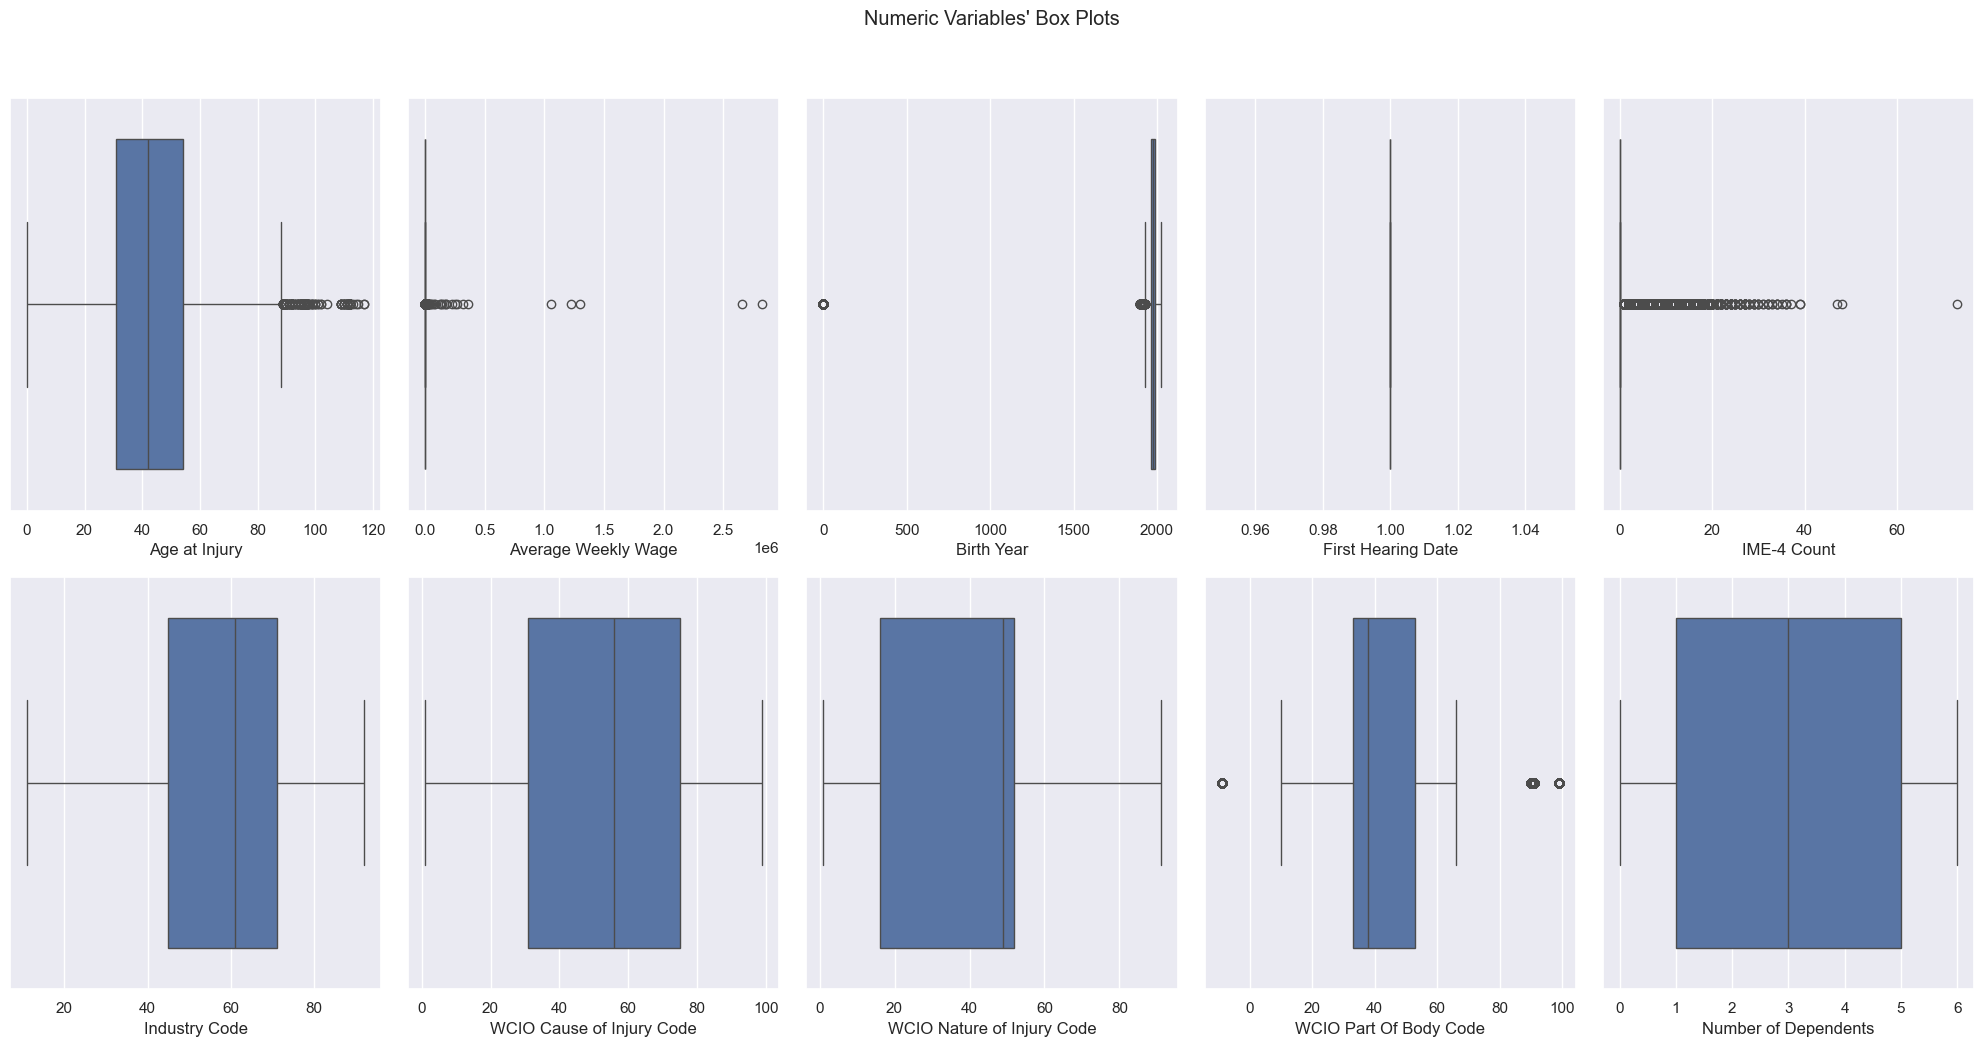

In [59]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(numerical_cols) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), numerical_cols): 
    sns.boxplot(x=train[feat], ax=ax)

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

#### Scaling

In [60]:
train_all_num = pd.concat([train[numerical_cols], cat_to_num], axis = 1)
test_all_num = pd.concat([test[numerical_cols], test_cat_to_num], axis=1)
test_all_num.dtypes

Age at Injury                          Int64
Average Weekly Wage                  float64
Birth Year                             Int64
First Hearing Date                     int64
IME-4 Count                            Int64
Industry Code                          Int64
WCIO Cause of Injury Code              Int64
WCIO Nature of Injury Code             Int64
WCIO Part Of Body Code                 Int64
Number of Dependents                   Int64
Medical Fee Region                     int64
Gender                                 int64
Zip Code                               int64
District Name                          int64
Alternative Dispute Resolution         int64
COVID-19 Indicator                     int64
WCIO Cause of Injury Description       int64
WCIO Nature of Injury Description      int64
Attorney/Representative                int64
County of Injury                       int64
Carrier Type                           int64
Industry Code Description              int64
WCIO Part 

In [61]:
train_all_num.dtypes

Age at Injury                          Int64
Average Weekly Wage                  float64
Birth Year                             Int64
First Hearing Date                     int64
IME-4 Count                            Int64
Industry Code                          Int64
WCIO Cause of Injury Code              Int64
WCIO Nature of Injury Code             Int64
WCIO Part Of Body Code                 Int64
Number of Dependents                   Int64
Medical Fee Region                     int64
Gender                                 int64
Zip Code                               int64
District Name                          int64
Alternative Dispute Resolution         int64
COVID-19 Indicator                     int64
WCIO Cause of Injury Description       int64
WCIO Nature of Injury Description      int64
Attorney/Representative                int64
County of Injury                       int64
Carrier Type                           int64
Industry Code Description              int64
WCIO Part 

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

def scale_features(train_all_num, test_all_num, strategy='standard', missing_value_strategy='mean'):
    """
    Scales numerical features in training and testing datasets.

    Parameters:
    - train_all_num: Pandas DataFrame with numerical features of the training dataset.
    - test_all_num: Pandas DataFrame with numerical features of the testing dataset.
    - strategy: String indicating the scaling strategy. Supported strategies are 'standard', 'minmax', and 'robust'.
    - missing_value_strategy: String or callable indicating how to handle missing values. Supported are 'mean', 'median', 'mode', or a custom function.

    Returns:
    - train_scaled: Scaled training dataset as a Pandas DataFrame.
    - test_scaled: Scaled testing dataset as a Pandas DataFrame.
    - scaler: The scaler object used for scaling.
    """
    # Input validation
    if not isinstance(train_all_num, pd.DataFrame) or not isinstance(test_all_num, pd.DataFrame):
        raise ValueError("Both train_all_num and test_all_num must be Pandas DataFrames.")
    
    # Convert Int64 dtypes to int64 dtypes
    train_all_num = train_all_num.apply(lambda x: x.astype('int64') if x.dtype == 'Int64' else x)
    test_all_num = test_all_num.apply(lambda x: x.astype('int64') if x.dtype == 'Int64' else x)
    
    # Check if all columns are numerical
    if not all(train_all_num.dtypes.map(lambda x: pd.api.types.is_numeric_dtype(x))):
        raise ValueError("All columns in train_all_num must be numerical.")
    
    if len(train_all_num) > 0:
        if strategy not in ['standard', 'minmax', 'robust']:
            raise ValueError("Unsupported strategy. Supported strategies are 'standard', 'minmax', and 'robust'.")
        
        if strategy == 'standard':
            scaler = StandardScaler()
        elif strategy == 'minmax':
            scaler = MinMaxScaler()
        elif strategy == 'robust':
            scaler = RobustScaler()
        
        # Fill any NaN values before scaling
        if missing_value_strategy == 'mean':
            train_all_num = train_all_num.fillna(train_all_num.mean())
            test_all_num = test_all_num.fillna(train_all_num.mean())
        elif missing_value_strategy == 'median':
            train_all_num = train_all_num.fillna(train_all_num.median())
            test_all_num = test_all_num.fillna(train_all_num.median())
        elif missing_value_strategy == 'mode':
            train_all_num = train_all_num.fillna(train_all_num.mode().iloc[0])
            test_all_num = test_all_num.fillna(train_all_num.mode().iloc[0])
        else:
            raise ValueError("Unsupported missing_value_strategy. Supported strategies are 'mean', 'median', and 'mode'.")
        
        # Scale the data
        train_scaled = pd.DataFrame(scaler.fit_transform(train_all_num), columns=train_all_num.columns)
        test_scaled = pd.DataFrame(scaler.transform(test_all_num), columns=test_all_num.columns)
    
    return train_scaled, test_scaled, scaler

# Example usage
train_scaled, test_scaled, scaler = scale_features(train_all_num, test_all_num, strategy='standard', missing_value_strategy='mean')

ValueError: cannot convert NA to integer

In [ ]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [ ]:
cor_spearman = train_all_num.corr(method ='spearman')
cor_heatmap(cor_spearman)

### Model